## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-4
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.75,0.85,0.95]
NESTEROV = ['TRUE','FALSE']

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in MOMENTUM:
    for j in NESTEROV:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = %f , NESTEROV=%s" % (i,j))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=bool(j), momentum=i)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "momentum: %f nesterov: %s" % (i,j)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.750000 , NESTEROV=TRUE
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 7s 3

196/196 [==============================] - 5s 25ms/step - loss: 1.8061 - accuracy: 0.3701 - val_loss: 1.8107 - val_accuracy: 0.3642
Experiment with MOMENTUM = 0.750000 , NESTEROV=FALSE
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable p

196/196 [==============================] - 5s 25ms/step - loss: 1.8279 - accuracy: 0.3627 - val_loss: 1.8292 - val_accuracy: 0.3624
Epoch 50/50
196/196 [==============================] - 5s 26ms/step - loss: 1.8248 - accuracy: 0.3638 - val_loss: 1.8264 - val_accuracy: 0.3650
Experiment with MOMENTUM = 0.850000 , NESTEROV=TRUE
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
________________________________________________________

196/196 [==============================] - 5s 26ms/step - loss: 1.7368 - accuracy: 0.3958 - val_loss: 1.7411 - val_accuracy: 0.3934
Epoch 49/50
196/196 [==============================] - 5s 25ms/step - loss: 1.7338 - accuracy: 0.3967 - val_loss: 1.7381 - val_accuracy: 0.3932
Epoch 50/50
196/196 [==============================] - 5s 25ms/step - loss: 1.7309 - accuracy: 0.3974 - val_loss: 1.7354 - val_accuracy: 0.3937
Experiment with MOMENTUM = 0.850000 , NESTEROV=FALSE
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___________________________________________

196/196 [==============================] - 5s 24ms/step - loss: 1.7608 - accuracy: 0.3883 - val_loss: 1.7626 - val_accuracy: 0.3875
Epoch 48/50
196/196 [==============================] - 5s 25ms/step - loss: 1.7574 - accuracy: 0.3895 - val_loss: 1.7591 - val_accuracy: 0.3889
Epoch 49/50
196/196 [==============================] - 5s 25ms/step - loss: 1.7544 - accuracy: 0.3899 - val_loss: 1.7568 - val_accuracy: 0.3884
Epoch 50/50
196/196 [==============================] - 5s 26ms/step - loss: 1.7511 - accuracy: 0.3919 - val_loss: 1.7541 - val_accuracy: 0.3913
Experiment with MOMENTUM = 0.950000 , NESTEROV=TRUE
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
________________________________

196/196 [==============================] - 5s 25ms/step - loss: 1.5575 - accuracy: 0.4577 - val_loss: 1.5720 - val_accuracy: 0.4497
Epoch 47/50
196/196 [==============================] - 5s 25ms/step - loss: 1.5528 - accuracy: 0.4595 - val_loss: 1.5686 - val_accuracy: 0.4505
Epoch 48/50
196/196 [==============================] - 5s 27ms/step - loss: 1.5486 - accuracy: 0.4609 - val_loss: 1.5689 - val_accuracy: 0.4482
Epoch 49/50
196/196 [==============================] - 5s 26ms/step - loss: 1.5445 - accuracy: 0.4616 - val_loss: 1.5629 - val_accuracy: 0.4533
Epoch 50/50
196/196 [==============================] - 6s 28ms/step - loss: 1.5398 - accuracy: 0.4647 - val_loss: 1.5598 - val_accuracy: 0.4522
Experiment with MOMENTUM = 0.950000 , NESTEROV=FALSE
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
___________________

196/196 [==============================] - 5s 25ms/step - loss: 1.5746 - accuracy: 0.4501 - val_loss: 1.5890 - val_accuracy: 0.4462
Epoch 46/50
196/196 [==============================] - 5s 25ms/step - loss: 1.5697 - accuracy: 0.4535 - val_loss: 1.5870 - val_accuracy: 0.4468
Epoch 47/50
196/196 [==============================] - 5s 25ms/step - loss: 1.5661 - accuracy: 0.4547 - val_loss: 1.5794 - val_accuracy: 0.4501
Epoch 48/50
196/196 [==============================] - 5s 25ms/step - loss: 1.5608 - accuracy: 0.4552 - val_loss: 1.5781 - val_accuracy: 0.4460
Epoch 49/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5571 - accuracy: 0.4574 - val_loss: 1.5735 - val_accuracy: 0.4489
Epoch 50/50
196/196 [==============================] - 5s 25ms/step - loss: 1.5525 - accuracy: 0.4578 - val_loss: 1.5695 - val_accuracy: 0.4504


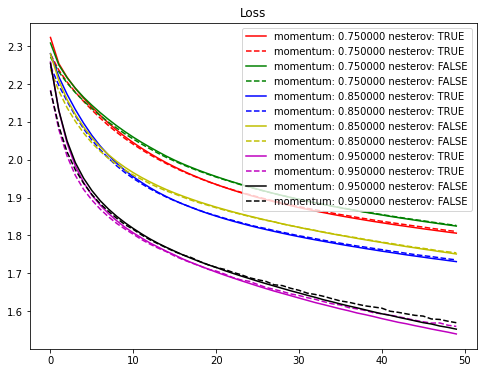

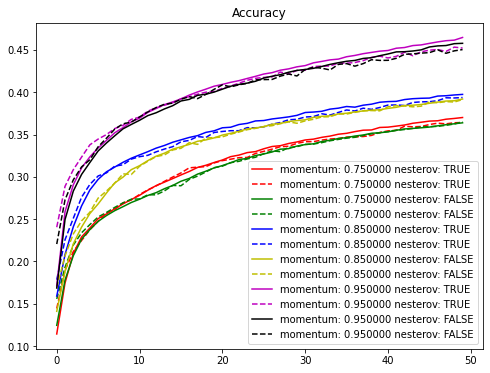

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()